# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.RandomState = 42

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Сиды фиксируются для гарантии генерации одних и тех же псевдослучайных чисел; таким образом, в домашке можно зафиксровать единственный правильный ответ, исключив влияние генерации псевдослучайных чисел")

Сиды фиксируются для гарантии генерации одних и тех же псевдослучайных чисел; таким образом, в домашке можно зафиксровать единственный правильный ответ, исключив влияние генерации псевдослучайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.take(random.sample(list(df_train.index), 10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5238,Ford Freestyle Trend Diesel BSIV,2018,675000,60000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
912,Mercedes-Benz E-Class E250 CDI Avantgarde,2016,2900000,31000,Diesel,Dealer,Automatic,First Owner,13.0 kmpl,2143 CC,204 bhp,500Nm@ 1600-1800rpm,5.0
204,Hyundai Creta 1.6 CRDi SX Plus Dual Tone,2017,1100000,37000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
6074,Toyota Innova 2.5 E Diesel MS 8-seater,2007,409999,248119,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
2253,Maruti Wagon R LXI CNG,2011,200000,137000,CNG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
2006,Maruti Wagon R LXI BS IV,2016,350000,70000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
1828,Maruti Swift Dzire LDi,2010,215000,120000,Diesel,Individual,Manual,Third Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
1143,Maruti Celerio VDi,2015,250000,100000,Diesel,Individual,Manual,Second Owner,27.62 kmpl,793 CC,47 bhp,125Nm@ 2000rpm,5.0
6033,Hyundai i20 Sportz 1.2,2013,315000,49000,Petrol,Individual,Manual,Second Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
839,Maruti Wagon R VXI BS IV,2011,200000,94000,Petrol,Individual,Manual,Third Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
# mileage engine max_power torque являются числовыми признаками, но не приведены к числовому типу
# следуя подсказке: .describe() с нужным(и) аргументом(-ами) пока оставим их в категориальных

In [9]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
df_train.describe(exclude=[np.number])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [11]:
df_test.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [12]:
df_test.describe(exclude=[np.number])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [13]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [14]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [15]:
print(f'Колонки с пропусками в df_train: {list(df_train.columns[df_train.isna().any()])}')
print(f'Колонки с пропусками в df_test: {list(df_train.columns[df_train.isna().any()])}')

Колонки с пропусками в df_train: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Колонки с пропусками в df_test: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [16]:
df_train[df_train.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
6889,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6901,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6949,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [17]:
df_test[df_test.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
34,Toyota Etios Liva GD SP,2012,405000,150000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
57,Tata Sumo EX BS IV,2012,254999,190000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
66,Maruti Swift 1.3 ZXI,2008,200000,90000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
71,Hyundai Santro LE,2002,35000,184000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
118,Mahindra Bolero LX,2006,210000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
145,Maruti Swift VDI BSIV,2011,340000,160000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
149,Hyundai Santro Xing XG,2005,110000,53563,Petrol,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
208,Tata Indica Vista Aqua 1.3 Quadrajet (ABS),2012,200000,80000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
295,Hyundai Santro Xing XS eRLX Euro II,2003,85000,68300,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
471,Hyundai Santro GLS I - Euro II,2009,195000,56000,Petrol,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [18]:
dup_all = df_train[df_train.drop(columns=['selling_price']).duplicated(keep=False)].sort_values('name').shape[0]
dup_first = df_train[df_train.drop(columns=['selling_price']).duplicated()].sort_values('name').shape[0]
print(f'Объектов с одинаковым признаковым описанием (вместе с дубликатами): {dup_all}')
print(f'Объектов с одинаковым признаковым описанием (без дубликатов): {dup_first}')

Объектов с одинаковым признаковым описанием (вместе с дубликатами): 1799
Объектов с одинаковым признаковым описанием (без дубликатов): 1159


(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [19]:
df_train[df_train.drop(columns=['selling_price']).duplicated(keep=False)].sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

In [20]:
df_train = df_train[~df_train.drop(columns=['selling_price']).duplicated()]

In [21]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

#### 1) mileage

In [23]:
mileage_units = df_train[~df_train['mileage'].isna()]['mileage'].apply(lambda s: s.split()[1])
mileage_units.value_counts()

kmpl     5577
km/kg      77
Name: mileage, dtype: int64

In [24]:
mileage_units = df_test[~df_test['mileage'].isna()]['mileage'].apply(lambda s: s.split()[1])
mileage_units.value_counts()

kmpl     972
km/kg      9
Name: mileage, dtype: int64

In [25]:
def get_numerical_mileage(row):
    '''
        Returns mileage in the kmpl units
            On average 1 liter of gas weights 0.73 kg -> 1 kg = 1.37 liter
    '''
    if row == row:
        mileage = float(row.split()[0]) if 'kmpl' in row else float(row.split()[0]) * 1.37
        return mileage
    else:
        return row
    
df_train['mileage'] = df_train['mileage'].apply(get_numerical_mileage)
df_test['mileage'] = df_test['mileage'].apply(get_numerical_mileage)

#### 2) engine

In [26]:
engine_units = df_train[~df_train['engine'].isna()]['engine'].apply(lambda s: s.split()[1])
engine_units.value_counts()

CC    5654
Name: engine, dtype: int64

In [27]:
engine_units = df_test[~df_test['engine'].isna()]['engine'].apply(lambda s: s.split()[1])
engine_units.value_counts()

CC    981
Name: engine, dtype: int64

In [28]:
df_train['engine'] = df_train['engine'].apply(lambda row: float(row.split()[0]) if row == row else row)
df_test['engine'] = df_test['engine'].apply(lambda row: float(row.split()[0]) if row == row else row)

#### 3) max_power

In [29]:
# 1) max_power не содержит bhp
df_train[~df_train['max_power'].str.contains('bhp', flags=re.IGNORECASE).fillna(True)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
476,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1112,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2003,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN


In [30]:
df_test[~df_test['max_power'].str.contains('bhp', flags=re.IGNORECASE).fillna(True)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [31]:
# заменим max_power == 0 на np.NaN
# во-первых, это позволит заменить их на медиану в следующем пункте
# во-вторых, немного скорректирует саму медиану
idx = list(df_train[~df_train['max_power'].str.contains('bhp', flags=re.IGNORECASE).fillna(True)].index)
df_train.loc[idx, 'max_power'] = np.NaN

In [32]:
# 2) max_power не содержит цифр
df_train[df_train['max_power'].fillna('1').apply(lambda s: len(re.findall('\d', s)) == 0)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,14.933,796.0,bhp,NaN,8.0


In [33]:
df_test[df_test['max_power'].fillna('1').apply(lambda s: len(re.findall('\d', s)) == 0)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [34]:
# также заменим на np.NaN
idx = list(df_train[df_train['max_power'].fillna('1').apply(lambda s: len(re.findall('\d', s)) == 0)].index)
df_train.loc[idx, 'max_power'] = np.NaN

In [35]:
max_power_units = df_train[~df_train['max_power'].isna()]['max_power'].apply(lambda s: s.split()[1])
max_power_units.value_counts()

bhp    5653
Name: max_power, dtype: int64

In [36]:
df_train['max_power'] = df_train['max_power'].apply(lambda row: float(row.split()[0]) if row == row else row)
df_test['max_power'] = df_test['max_power'].apply(lambda row: float(row.split()[0]) if row == row else row)

#### 4) torque

In [37]:
# стоблец надо разбить на два
# посмотрим на единицы измерения обоих
torque = df_train[['torque']].dropna().rename(columns={'torque': 'torque_text'})
torque

,torque_text
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,22.4 kgm at 1750-2750rpm
3,"11.5@ 4,500(kgm@ rpm)"
4,113.75nm@ 4000rpm
...,...
5835,96.1Nm@ 3000rpm
5836,90Nm@ 3500rpm
5837,113.7Nm@ 4000rpm
5838,"24@ 1,900-2,750(kgm@ rpm)"


In [38]:
# 1) единицы измерения второй величины всегда rpm; в случае, если они не указаны, будем считать, что подразумевались rpm
torque[~torque['torque_text'].str.contains('rpm', flags=re.IGNORECASE)]

,torque_text
129,400Nm
350,400Nm
1301,510@ 1600-2400
2641,135.4Nm@ 2500
3144,135.4Nm@ 2500
3200,190Nm@ 2000-3000
3207,210 / 1900
4068,210 / 1900
4210,210 / 1900
4660,210 / 1900


In [39]:
# 2) единицы измерения первой величины kgm или nm; в случае, если они не указаны, из чисел следует, что подразумевалось nm
torque[torque['torque_text'].apply(lambda s: ('kgm' not in s.lower()) and ('nm' not in s.lower()))]

,torque_text
125,250@ 1250-5000rpm
1301,510@ 1600-2400
3207,210 / 1900
4068,210 / 1900
4210,210 / 1900
4660,210 / 1900
5181,210 / 1900
5296,210 / 1900
5472,210 / 1900


In [40]:
def get_numerical_torque_and_max_torque_rpm(row):
    '''
        Returns torque in the nm units and max_torque_rpm in rpm units
            On average 1 kgm = 9.8 nm
    '''
    if row == row:
        row = re.sub(',', '', row).lower()
        pat = '\d+\.*\d*'
        
        ### torque ###
        torque = float(re.findall('\d+\.*\d*', row)[0])
        if 'kgm' in row:
            torque *= 9.8
            
        ### max_torque_rpm ###
        max_torque_rpm = np.NaN
        if len(re.findall(pat, row)) == 2:
            max_torque_rpm = float(re.findall(pat, row)[1])
        elif len(re.findall(pat, row)) == 3: 
            if '+/-' in row: # если max_torque_rpm представлен в виде значение +/- разброс, берем значение
                max_torque_rpm = float(re.findall(pat, row)[1])
            else: # если max_torque_rpm представлен интервалом, берем среднее
                max_torque_rpm = 0.5*float(re.findall(pat, row)[1]) + 0.5*float(re.findall(pat, row)[2])

        return [torque, max_torque_rpm]
    else:
        return [np.NaN, np.NaN]

In [41]:
torque['torque_and_max_torque_rpm'] = torque['torque_text'].apply(get_numerical_torque_and_max_torque_rpm)
torque['torque'] = torque['torque_and_max_torque_rpm'].apply(lambda row: row[0])
torque['max_torque_rpm'] = torque['torque_and_max_torque_rpm'].apply(lambda row: row[1])
torque

,torque_text,torque_and_max_torque_rpm,torque,max_torque_rpm
0,190Nm@ 2000rpm,"[190.0, 2000.0]",190.00,2000.0
1,250Nm@ 1500-2500rpm,"[250.0, 2000.0]",250.00,2000.0
2,22.4 kgm at 1750-2750rpm,"[219.52, 2250.0]",219.52,2250.0
3,"11.5@ 4,500(kgm@ rpm)","[112.7, 4500.0]",112.70,4500.0
4,113.75nm@ 4000rpm,"[113.75, 4000.0]",113.75,4000.0
...,...,...,...,...
5835,96.1Nm@ 3000rpm,"[96.1, 3000.0]",96.10,3000.0
5836,90Nm@ 3500rpm,"[90.0, 3500.0]",90.00,3500.0
5837,113.7Nm@ 4000rpm,"[113.7, 4000.0]",113.70,4000.0
5838,"24@ 1,900-2,750(kgm@ rpm)","[235.20000000000002, 2325.0]",235.20,2325.0


In [42]:
df_train['torque_and_max_torque_rpm'] = df_train['torque'].apply(get_numerical_torque_and_max_torque_rpm)
df_train['torque'] = df_train['torque_and_max_torque_rpm'].apply(lambda row: row[0])
df_train['max_torque_rpm'] = df_train['torque_and_max_torque_rpm'].apply(lambda row: row[1])
df_train = df_train.drop('torque_and_max_torque_rpm', axis='columns')

df_test['torque_and_max_torque_rpm'] = df_test['torque'].apply(get_numerical_torque_and_max_torque_rpm)
df_test['torque'] = df_test['torque_and_max_torque_rpm'].apply(lambda row: row[0])
df_test['max_torque_rpm'] = df_test['torque_and_max_torque_rpm'].apply(lambda row: row[1])
df_test = df_test.drop('torque_and_max_torque_rpm', axis='columns')

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [43]:
for c in ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']:
    med = df_train[c].median()
    df_train[c] = df_train[c].fillna(med)
    df_test[c] = df_test[c].fillna(med)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [44]:
df_train['seats'].value_counts()

5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [45]:
print("Число сидений seats можно было бы трактовать как тип кузова автомобиля (e.g. седан/минивэн), закодировав их в OneHotEncoding. \nЕсли же мы оставляем seats целочисленным, то неясно, как трактовать 'расстояние' между разными сиденьями: например, численно 6-5==7-6, но 5 - седан, а 6 и 7 - минивэны, т. е. 6 и 7 'ближе' друг к другу по смыслу, чем 5 и 6")

Число сидений seats можно было бы трактовать как тип кузова автомобиля (e.g. седан/минивэн), закодировав их в OneHotEncoding. 
Если же мы оставляем seats целочисленным, то неясно, как трактовать 'расстояние' между разными сиденьями: например, численно 6-5==7-6, но 5 - седан, а 6 и 7 - минивэны, т. е. 6 и 7 'ближе' друг к другу по смыслу, чем 5 и 6


In [46]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [47]:
# удалим выбросы для отображения pairplot
df_eo = df_train.copy()._get_numeric_data()
mask = df_train['year'] > 0
for c in ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']:
    mask = mask & (df_eo[c] <= df_eo[c].quantile(0.99)) & (df_eo[c] >= df_eo[c].quantile(0.01))
df_eo = df_eo[mask]

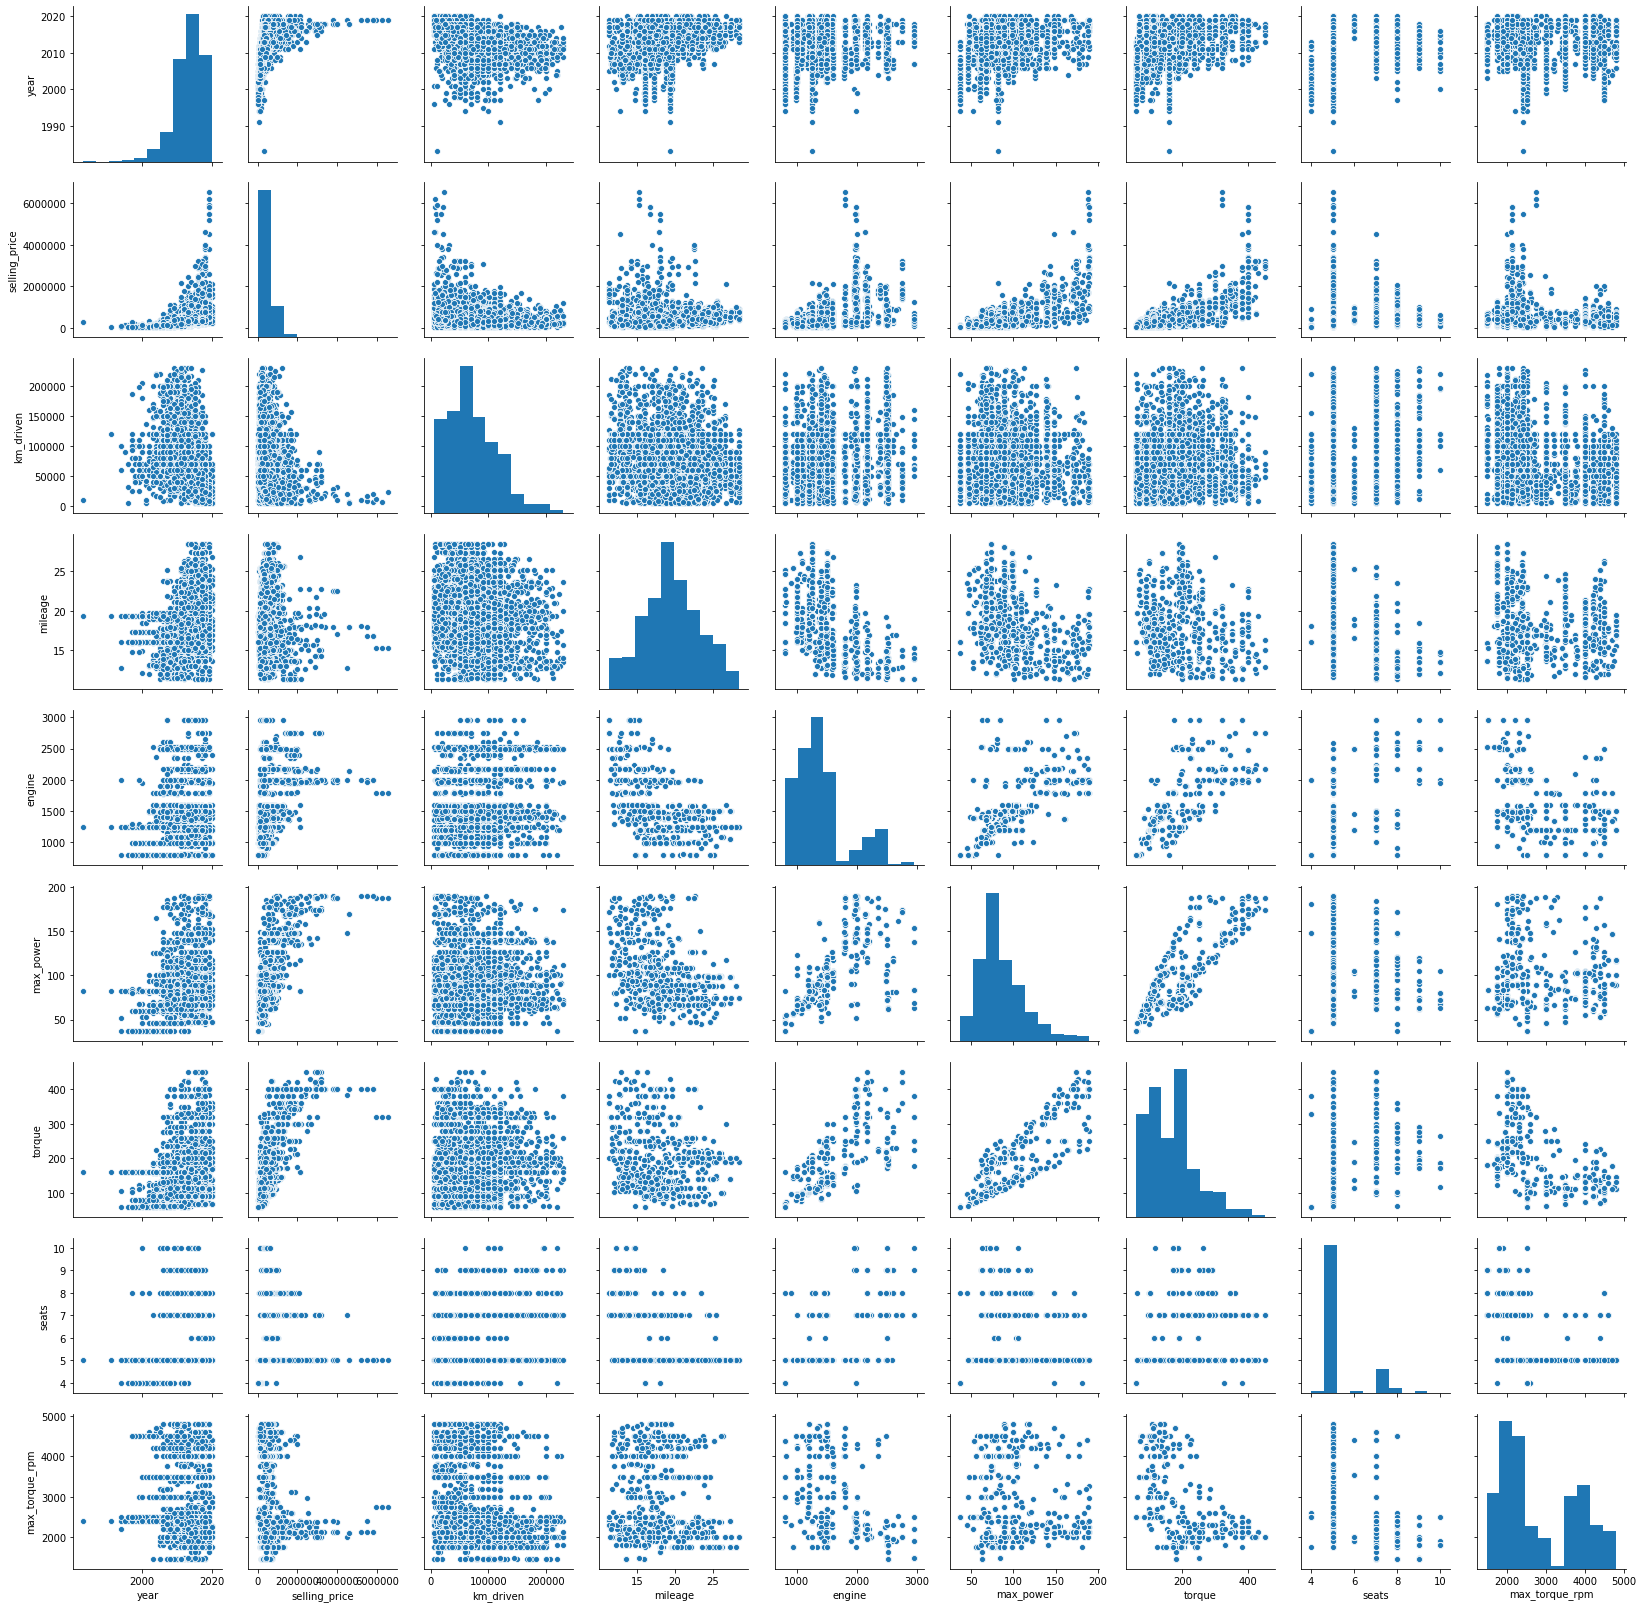

In [48]:
sns.pairplot(df_eo);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

*все выводы не строгие*

- selling price:
    + year: Прямая зависимость от года выпуска
    + km_driven: Обратная зависимость от пробега
    + engine: Прямая зависимость от объема двигателя
    + max_power: Прямая зависимость от мощности двигателя
    + torque: Прямая зависимость от крутящего момента
- year: 
    + max_power: Обратная зависимость от мощности двигателя
    + torque: Обратная зависимость от крутящего момента
- mileage:
    + engine: Обратная зависимость от объема двигателя
    + max_power: Обратная зависимость от мощности двигателя
    + torque: Обратная зависимость от крутящего момента
- engine:
    + max_power: Прямая зависимость от мощности двигателя
    + torque: Прямая зависимость от крутящего момента
    + seats: Прямая зависимость от числа сидений
- max_power:
    + torque: Прямая зависимость от крутящего момента

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

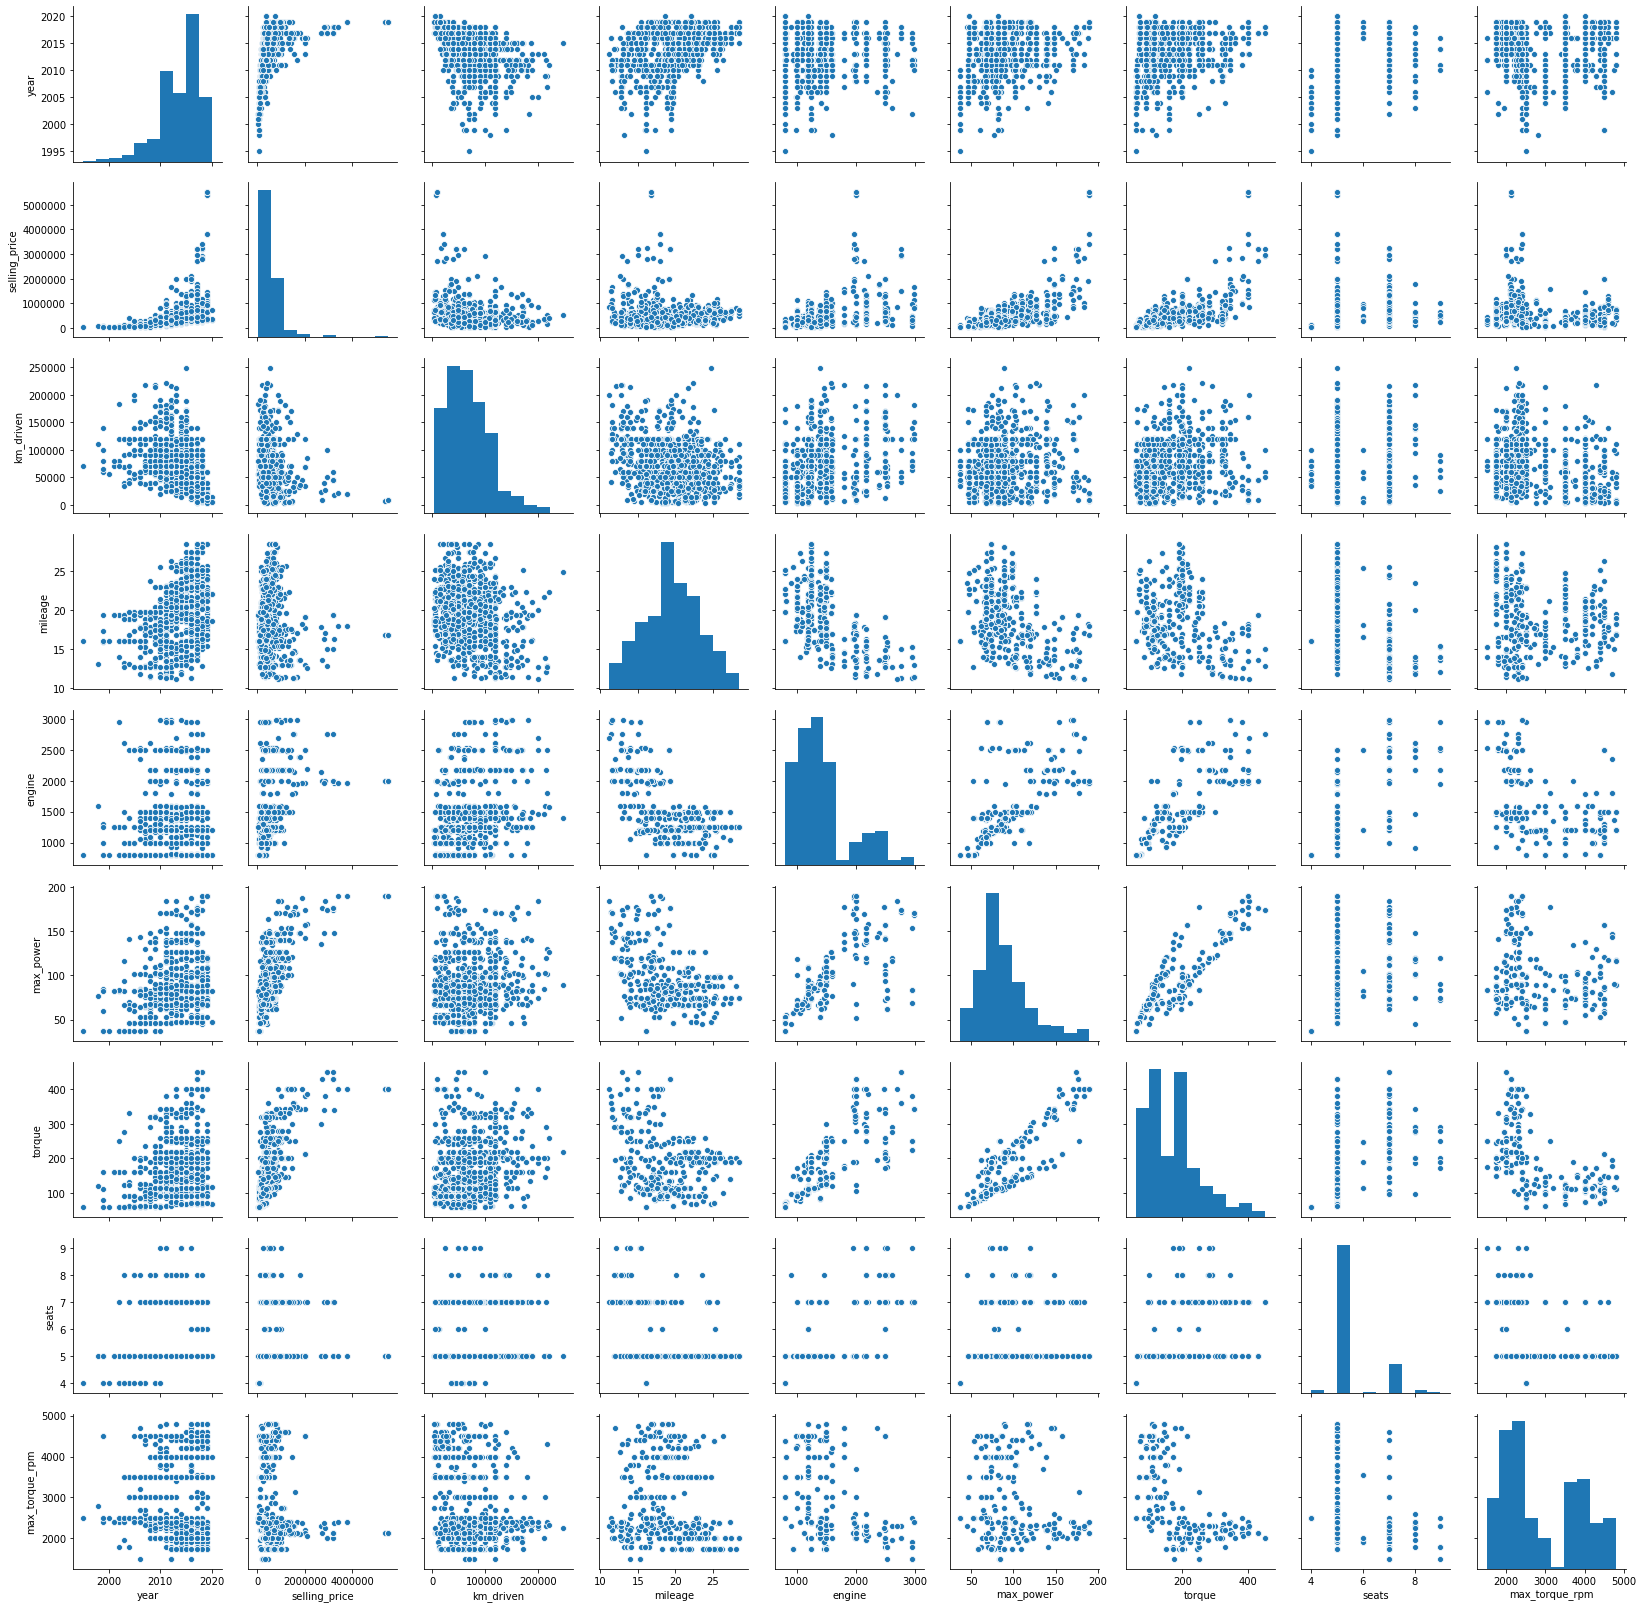

In [49]:
df_eo = df_test.copy()._get_numeric_data()
mask = df_test['year'] > 0
for c in ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']:
    mask = mask & (df_eo[c] <= df_eo[c].quantile(0.99)) & (df_eo[c] >= df_eo[c].quantile(0.01))
df_eo = df_eo[mask]
sns.pairplot(df_eo);

Внешне распределение test похоже на распределение train

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

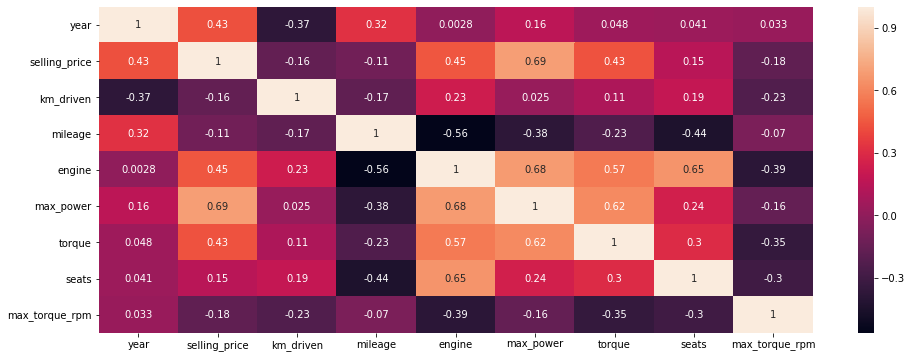

In [50]:
plt.figure(figsize=(16, 6))
dataplot = sns.heatmap(df_train.corr(), annot=True);
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

+ Наименее скоррелированы между собой год выпуска (year) и объем двигателя (engine)
+ Сильная положительная зависимость между признаками (engine, max_power), (engine, torque), (engine, seats)
+ Да, т. к. корреляция отрицательная 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

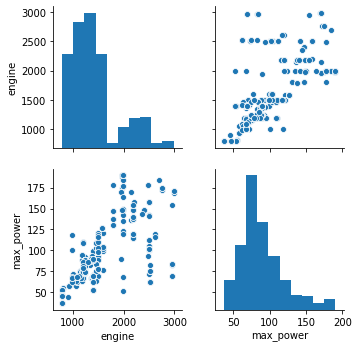

In [51]:
sns.pairplot(df_eo[['engine', 'max_power']]);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

# BOXPLOT

#### 1) Распределения некоторых признаков

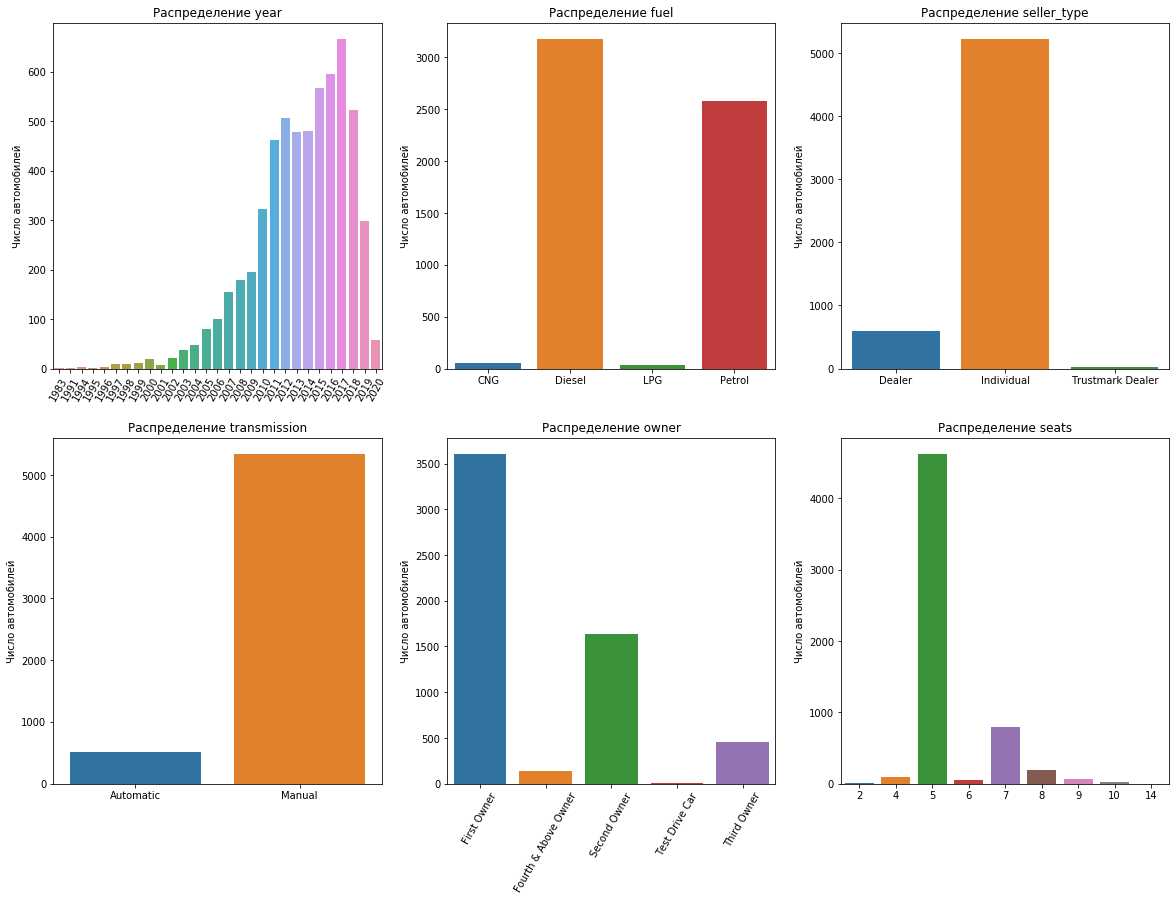

In [52]:
columns = ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
for i, ax in enumerate(axes.flatten()):
    c_count = df_train[columns[i]].value_counts().sort_index()
    sns.barplot(ax=ax, x=c_count.index, y=c_count.values);
    ax.set_title(f'Распределение {columns[i]}')
    ax.set_ylabel(f'Число автомобилей')
    if i in [0, 4]:
        ax.tick_params(axis='x', rotation=60)

#### 2) выбросы

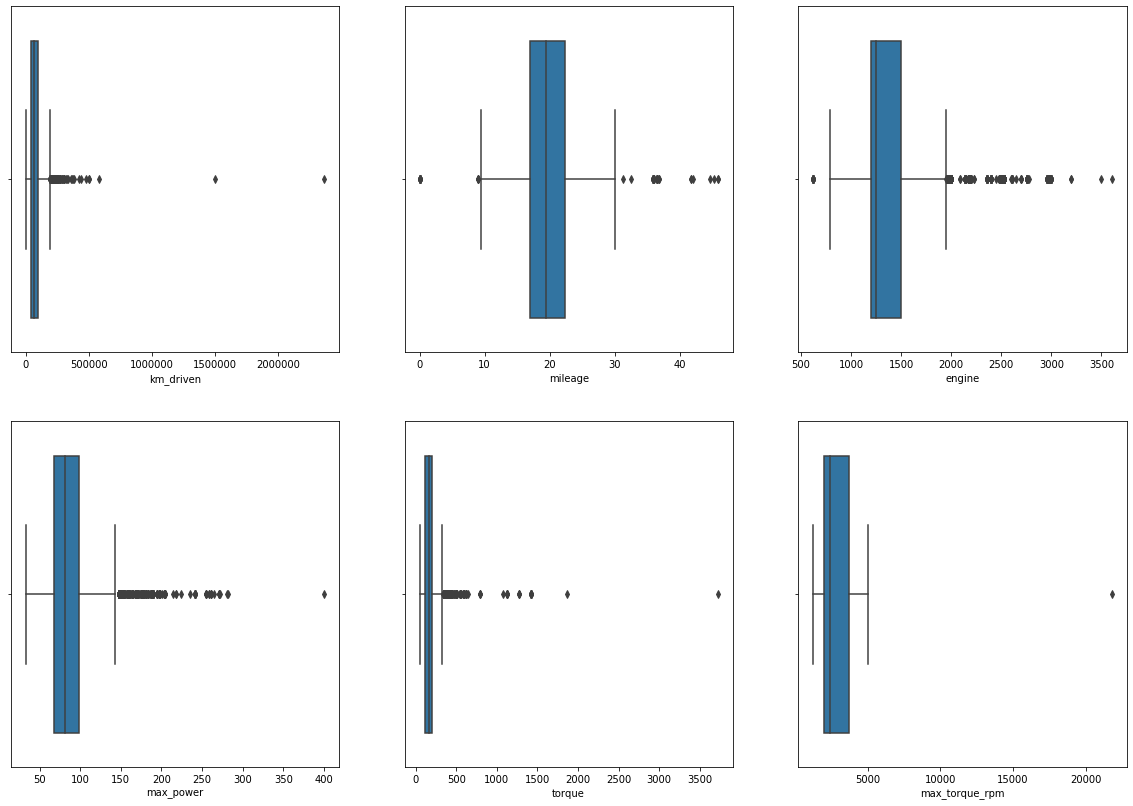

In [53]:
columns = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(ax=ax, x=df_train[columns[i]]);

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [54]:
y_train = df_train['selling_price']
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
X_train = df_train[features]

In [55]:
X_train.shape

(5840, 8)

In [56]:
# мы не выкинули torque, а разделили на 2 признака
assert X_train.shape == (5840, 8)

In [57]:
y_test = df_test['selling_price']
X_test = df_test[features]

In [58]:
X_test.shape

(1000, 8)

In [59]:
# мы не выкинули torque, а разделили на 2 признака
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

regr = LinearRegression()
regr.fit(X_train, y_train)

pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.6021674868300311
train: MSE = 114034050519.78189
test: r2 = 0.5997264293704065
test: MSE = 230088678465.25208


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

regr = LinearRegression()
regr.fit(X_train_s, y_train)

pred_train = regr.predict(X_train_s)
pred_test = regr.predict(X_test_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.6021674868300313
train: MSE = 114034050519.78185
test: r2 = 0.5997264293704062
test: MSE = 230088678465.25226


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [62]:
i_max_coef = np.argmax(abs(regr.coef_))
print(f'Наиболее информативный признак - {features[i_max_coef]}, коэффициент при нем равен {regr.coef_[i_max_coef]}')

Наиболее информативный признак - max_power, коэффициент при нем равен 329380.8246315962


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_s, y_train)

pred_train = lasso.predict(X_train_s)
pred_test = lasso.predict(X_test_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.6021674867860098
train: MSE = 114034050532.4001
test: r2 = 0.5997251903839165
test: MSE = 230089390670.06662


In [64]:
lasso.coef_

array([162346.53196119, -50011.22380711,  -2298.71423023,  19147.51831426,
       329382.38350775,   2268.36424206, -29535.27546312, -61172.52993311])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

L1-регуляризация с параметрами по умолчанию не занулила никаких весов; параметр регуляризации alpha недостаточно большой

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [65]:
from sklearn.model_selection import GridSearchCV

alpha_range = [1, 10, 100, 1000, 5000, 10000, 20000, 30000, 40000, 100000]
param_grid = dict(alpha=alpha_range)
grid = GridSearchCV(Lasso(), param_grid, cv=10)
grid.fit(X_train_s, y_train);

In [66]:
lasso_g = grid.best_estimator_

pred_train = lasso_g.predict(X_train_s)
pred_test = lasso_g.predict(X_test_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.595746276093652
train: MSE = 115874615695.50342
test: r2 = 0.5754898768815313
test: MSE = 244020540926.08755


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Grid-search обучил всего 100 моделей (для каждого из 10 разных параметров alpha: 10 итераций кросс-валидации, после чего результаты усреднялись в 1 модель (для каждого alpha))

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

alpha = 20000

In [67]:
#занулились следующие веса:
grid.best_estimator_.coef_

array([148100.38220798, -29963.7007586 ,      0.        ,      0.        ,
       323174.35488983,      0.        ,     -0.        , -36251.76551961])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [68]:
from sklearn.linear_model import ElasticNet

alpha_range = np.arange(0.1, 1, 0.1)
l1_ratio_range = np.arange(0.1, 1, 0.1)
param_grid = dict(alpha=alpha_range, l1_ratio=l1_ratio_range)
grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid.fit(X_train_s, y_train);

In [69]:
elnet_g = grid.best_estimator_

pred_train = elnet_g.predict(X_train_s)
pred_test = elnet_g.predict(X_test_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.5951370721247833
train: MSE = 116049236908.86098
test: r2 = 0.5728732944628742
test: MSE = 245524627218.51318


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [70]:
elnet_g

ElasticNet(alpha=0.6, l1_ratio=0.8)

alpha=0.6, l1_ratio=0.8

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [71]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis='columns')
X_test_cat = df_test.drop(['name', 'selling_price'], axis='columns')

In [72]:
assert X_train_cat.shape == (5840, 12)

In [73]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [74]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop='first')
df_train_enc_sp = encoder.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_train_cat = pd.concat([X_train_cat, pd.DataFrame.sparse.from_spmatrix(df_train_enc_sp)], axis=1)
X_train_cat = X_train_cat.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis='columns')

df_test_enc_sp = encoder.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
X_test_cat = pd.concat([X_test_cat, pd.DataFrame.sparse.from_spmatrix(df_test_enc_sp)], axis=1)
X_test_cat = X_test_cat.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis='columns')

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
scaler.fit(X_train_cat)
X_train_cat_s = scaler.transform(X_train_cat)
X_test_cat_s = scaler.transform(X_test_cat)

alpha_range = np.arange(100, 500, 10)
param_grid = dict(alpha=alpha_range)
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X_train_cat_s, y_train);

regr = grid.best_estimator_
regr.fit(X_train_cat_s, y_train)

pred_train = regr.predict(X_train_cat_s)
pred_test = regr.predict(X_test_cat_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.6716211908058793
train: MSE = 94125956219.34424
test: r2 = 0.6234913481744404
test: MSE = 216427924514.26437


In [76]:
regr

Ridge(alpha=370)

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [77]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

df_train = df_train[~df_train.drop(columns=['selling_price']).duplicated()]
df_train = df_train.reset_index(drop=True)

def get_numerical_mileage(row):
    '''
        Returns mileage in the kmpl units
            On average 1 liter of gas weights 0.73 kg -> 1 kg = 1.37 liter
    '''
    if row == row:
        mileage = float(row.split()[0]) if 'kmpl' in row else float(row.split()[0]) * 1.37
        return mileage
    else:
        return row
    
df_train['mileage'] = df_train['mileage'].apply(get_numerical_mileage)
df_test['mileage'] = df_test['mileage'].apply(get_numerical_mileage)

df_train['engine'] = df_train['engine'].apply(lambda row: float(row.split()[0]) if row == row else row)
df_test['engine'] = df_test['engine'].apply(lambda row: float(row.split()[0]) if row == row else row)

idx = list(df_train[~df_train['max_power'].str.contains('bhp', flags=re.IGNORECASE).fillna(True)].index)
df_train.loc[idx, 'max_power'] = np.NaN

idx = list(df_train[df_train['max_power'].fillna('1').apply(lambda s: len(re.findall('\d', s)) == 0)].index)
df_train.loc[idx, 'max_power'] = np.NaN

df_train['max_power'] = df_train['max_power'].apply(lambda row: float(row.split()[0]) if row == row else row)
df_test['max_power'] = df_test['max_power'].apply(lambda row: float(row.split()[0]) if row == row else row)

def get_numerical_torque_and_max_torque_rpm(row):
    '''
        Returns torque in the nm units and max_torque_rpm in rpm units
            On average 1 kgm = 9.8 nm
    '''
    if row == row:
        row = re.sub(',', '', row).lower()
        pat = '\d+\.*\d*'
        
        ### torque ###
        torque = float(re.findall('\d+\.*\d*', row)[0])
        if 'kgm' in row:
            torque *= 9.8
            
        ### max_torque_rpm ###
        max_torque_rpm = np.NaN
        if len(re.findall(pat, row)) == 2:
            max_torque_rpm = float(re.findall(pat, row)[1])
        elif len(re.findall(pat, row)) == 3: 
            if '+/-' in row: # если max_torque_rpm представлен в виде значение +/- разброс, берем значение
                max_torque_rpm = float(re.findall(pat, row)[1])
            else: # если max_torque_rpm представлен интервалом, берем среднее
                max_torque_rpm = 0.5*float(re.findall(pat, row)[1]) + 0.5*float(re.findall(pat, row)[2])

        return [torque, max_torque_rpm]
    else:
        return [np.NaN, np.NaN]


df_train['torque_and_max_torque_rpm'] = df_train['torque'].apply(get_numerical_torque_and_max_torque_rpm)
df_train['torque'] = df_train['torque_and_max_torque_rpm'].apply(lambda row: row[0])
df_train['max_torque_rpm'] = df_train['torque_and_max_torque_rpm'].apply(lambda row: row[1])
df_train = df_train.drop('torque_and_max_torque_rpm', axis='columns')

df_test['torque_and_max_torque_rpm'] = df_test['torque'].apply(get_numerical_torque_and_max_torque_rpm)
df_test['torque'] = df_test['torque_and_max_torque_rpm'].apply(lambda row: row[0])
df_test['max_torque_rpm'] = df_test['torque_and_max_torque_rpm'].apply(lambda row: row[1])
df_test = df_test.drop('torque_and_max_torque_rpm', axis='columns')

medians = {}
for c in ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']:
    # замена na средним - скор ухудшился
    # med = df_train[c].mean()
    med = df_train[c].median()
    medians[c] = med
    df_train[c] = df_train[c].fillna(med)
    df_test[c] = df_test[c].fillna(med)

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# логарифмирование - скор ухудшился
# for c in ['km_driven', 'engine', 'torque', 'max_power']:
#     df_train[c] = df_train[c].apply(lambda x: np.log(x))
#     df_test[c] = df_test[c].apply(lambda x: np.log(x))

In [78]:
X_train_add = df_train.drop(['selling_price'], axis='columns').copy()
# добавим из name марку и модель автомобиля - скор улучшился
X_train_add['name'] = X_train_add['name'].apply(lambda s: s.split()[0] + s.split()[1])
# # единица мощности на объем - скор ухудшился
# X_train_add['power_per_vol'] = X_train_add['max_power'] / X_train_add['engine']
# X_train_add = X_train_add.drop(['engine', 'max_power'], axis='columns')
# # квадрат года - скор ухудшился
# X_train_add['year'] = X_train_add['year'] * X_train_add['year']


X_test_add = df_test.drop(['selling_price'], axis='columns').copy()
# добавим из name марку и модель автомобиля - скор улучшился
X_test_add['name'] = X_test_add['name'].apply(lambda s: s.split()[0] + s.split()[1])
# # единица мощности на объем - скор ухудшился
# X_test_add['power_per_vol'] = X_test_add['max_power'] / X_test_add['engine']
# X_test_add = X_test_add.drop(['engine', 'max_power'], axis='columns')
# # квадрат года - скор ухудшился
# X_test_add['year'] = X_test_add['year'] * X_test_add['year']

In [79]:
encoder = OneHotEncoder(handle_unknown='ignore')
cols_to_encode = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

df_train_enc_sp = encoder.fit_transform(X_train_add[cols_to_encode])
X_train_add = pd.concat([X_train_add, pd.DataFrame.sparse.from_spmatrix(df_train_enc_sp)], axis=1)
X_train_add = X_train_add.drop(cols_to_encode, axis='columns')

df_test_enc_sp = encoder.transform(X_test_add[cols_to_encode])
X_test_add = pd.concat([X_test_add, pd.DataFrame.sparse.from_spmatrix(df_test_enc_sp)], axis=1)
X_test_add = X_test_add.drop(cols_to_encode, axis='columns')

In [80]:
scaler = StandardScaler()
scaler.fit(X_train_add)
X_train_add_s = scaler.transform(X_train_add)
X_test_add_s = scaler.transform(X_test_add)

alpha_range = np.arange(100, 500, 10)
param_grid = dict(alpha=alpha_range)
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X_train_add_s, y_train);

regr = grid.best_estimator_
regr.fit(X_train_add_s, y_train)

pred_train = regr.predict(X_train_add_s)
pred_test = regr.predict(X_test_add_s)

print(f'train: r2 = {r2_score(y_train, pred_train)}')
print(f'train: MSE = {MSE(y_train, pred_train)}')
print(f'test: r2 = {r2_score(y_test, pred_test)}')
print(f'test: MSE = {MSE(y_test, pred_test)}')

train: r2 = 0.8976733932204294
train: MSE = 29330728537.09697
test: r2 = 0.9002159770007372
test: MSE = 57358705816.45953


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [81]:
def business_metrics(y_true, y_pred):
    df_prices = pd.DataFrame(pd.Series(y_true))
    df_prices.columns = ['true']
    df_prices['pred'] = y_pred
    df_prices['true10%'] = df_prices['true'] * 0.1
    df_prices['true-pred'] = (df_prices['true'] - df_prices['pred']).apply(lambda x: abs(x))
    return (df_prices['true-pred'] < df_prices['true10%']).sum() / len(df_prices)

business_metrics(y_test, pred_test)

0.357

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [82]:
import pickle
# запишем все параметры модели в папку pickle/
with open('pickle/medians.pickle', 'wb') as f:
    pickle.dump(medians, f, protocol=pickle.HIGHEST_PROTOCOL)    
with open('pickle/scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)    
with open('pickle/encoder.pickle', 'wb') as f:
    pickle.dump(encoder, f, protocol=pickle.HIGHEST_PROTOCOL)    
with open('pickle/model_weights.pickle', 'wb') as f:
    pickle.dump(regr, f, protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str 
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link